**The partial dependence:**
<br>
<center>Plot the average prediction if we force all data points to assume that feature value.</center>

**Formula**
<br>
The partial dependence function for regression is defined as:
<center>${\hat{f}_{x_S}}(x_S)={E_{x_C}}\left[\hat{f}(x_S,x_C)\right]=\int\hat{f}(x_S,x_C)d\mathbb{P}(x_C)$</center>
    
Estimator:
<center>$\hat{f}_{x_S}(x_S)=\frac{1}{n}\sum_{i=1}^n\hat{f}(x_S,x^{(i)}_{C})$</center>

* ${x_S}$ - are the interesred features(the ploted ones)- how they will effect the prediction.
* ${x_S}$ - are one or two featues, humen can see more than 3D.
* ${x_C}$ - are the other features.
* Now the name "partial dependent" is clear - the funtion is patially dependent on the features ${x_S}$.
* Continuous data:
<br>&nbsp;For calculating the $\hat{f}$ - each records in the data (fixed ${x_C}$) are giving a range of ${x_S}$ values.
* Categorical data:
<br>&nbsp;For calculating the $\hat{f}$ - each categorial values is relaced in all the data, and then prediction is taken on it.

In [64]:
import itertools
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestRegressor
from general.plot_pd import plot_2d_pd, plot_3d_pd
from sklearn.model_selection import train_test_split
from datasets.datasets_read import read_and_convert_br

%load_ext autoreload
%autoreload

# data sets locations
RENTAL_DATA_LOC='datasets/bike_rental/day.csv'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
# Load bike dataset and denormelized some data
br_data, X ,y = read_and_convert_br(RENTAL_DATA_LOC)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
clf = RandomForestRegressor().fit(X_train, y_train)
print(f' The model accuracy is : {round(clf.score(X_test,y_test)*100,2)}%')

 The model accuracy is : 99.73%


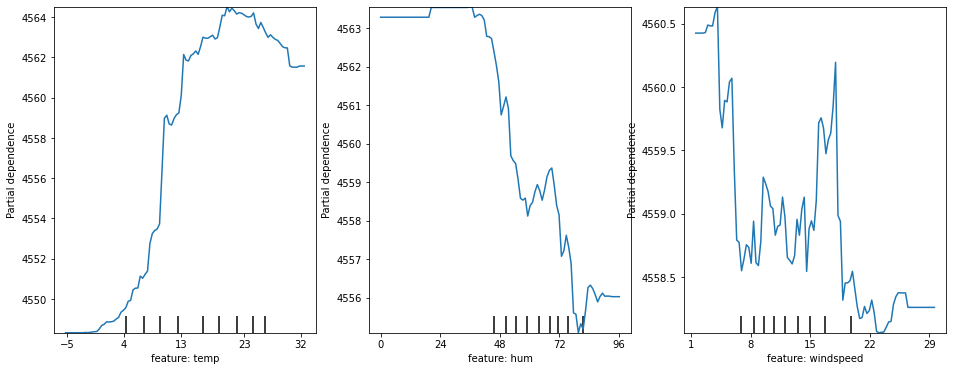

In [66]:
# partial dependence plot
features = ['ctemp','chum','cwindspeed']

# plot 2d partial dependency
plot_2d_pd(clf, X_train, features)

* Examine the data distribution above, in order not to make false assumptions

[4554.981859099805, 4555.620293542074, 4554.885440313112, 4554.678082191781]

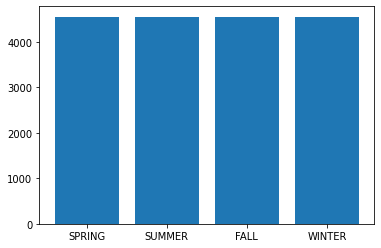

In [67]:
x = [] 
y = []

season_dict = {1:'SPRING', 2: 'SUMMER', 3: 'FALL', 4: 'WINTER'} 

for k,v in season_dict.items():
  df = pd.DataFrame(X_train,columns=X.columns)
  df['season'] = k
  x.append(np.mean(clf.predict(df.values)))
  y.append(v)

plt.bar(y,x)
x

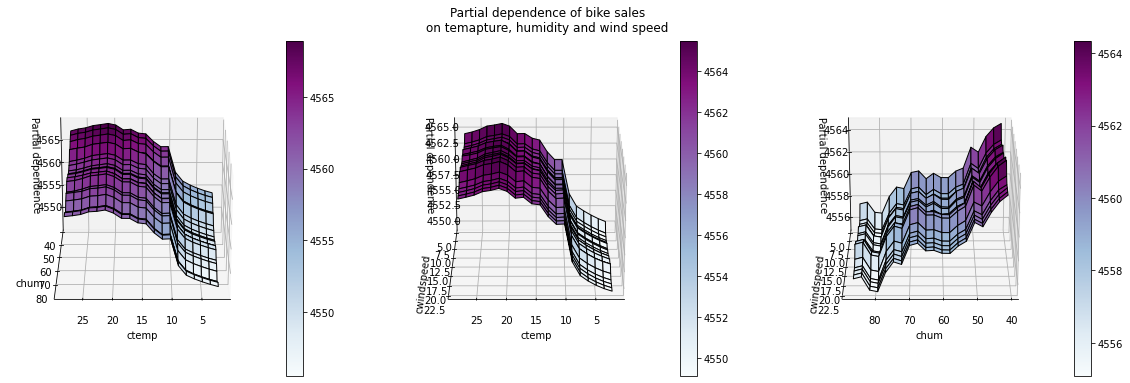

In [68]:
# all the continues features and all their combinations
features = ['ctemp','chum','cwindspeed']
features_comb=itertools.combinations(features, 2)

# plot 3d partial dependency of every 2 features
plot_3d_pd(clf, X_train, features, features_comb, grid_resolution=20, azim=90)


<hr><center>advantages and disadvantages</center></hr>

|advantages|disadvantages|
|:---:|:---:|
|**intuitive** - Average precision of all data points has the same value for that feature|**2D/3D plot** - it is impossible to plot it in higher dimintions |
|**Easy to implement** - There are out-of-the-box tools, and the tool in this repository ;)|**assumption of independance** - Data not correlated, if data is correlated unrealistic records can apper, e.g. height and weight, person above 2 meters not lokly to have eight below 60 kg|
||**Heterogeneous effects might be hidden** - in a dataset that half your data points have a positive association with the prediction -- the larger the feature value the larger the prediction -- and the other half has a negative association -- the smaller the feature value the larger the prediction. The PD curve could be a horizontal line, since the effects of both halves of the dataset could cancel each other out. You then conclude that the feature has no effect on the prediction.|